## The Spark Foundation
### Internship: Task 2
#### Name : B.R.Vishnu

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("C:\\Users\\brvis\\Downloads\\Iris.csv")

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


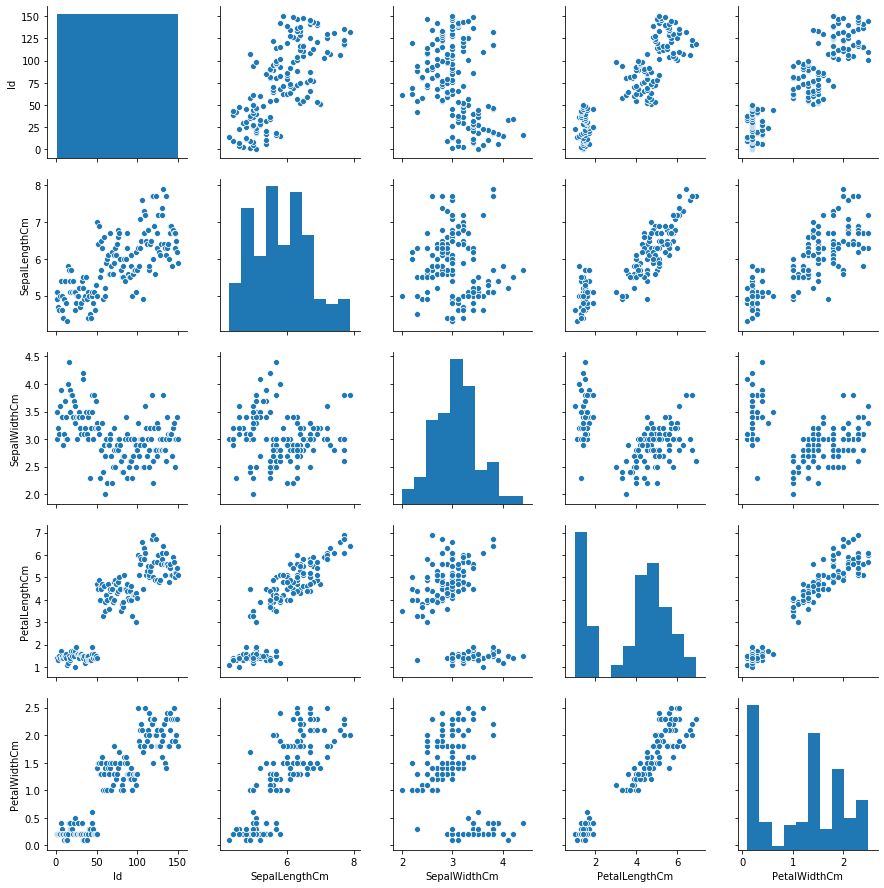

In [5]:
sns.pairplot(df)
plt.show()

#### Lets drop the "Id" column as it does is just an index and we already have the inbuilt indexing for dataframes

In [6]:
df.drop("Id",axis=1,inplace=True)

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X=df.drop("Species",axis=1)


### running a clustering algorithm in the iris data set

In [9]:
from sklearn.cluster import KMeans

### Using elbow method to find the optimum K value

In [10]:
k = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 200, n_init = 10)
    kmeans.fit(X)
    k.append(kmeans.inertia_)
    


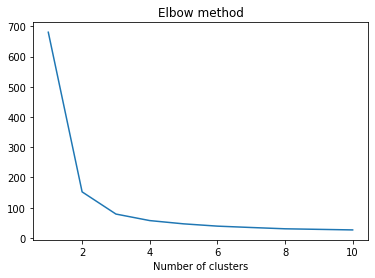

In [11]:
plt.plot(range(1, 11), k)
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.show()

### we can see that optimum value clearly from the graph

In [12]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

In [13]:
X.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

### Visualising the clusters - On the first two columns

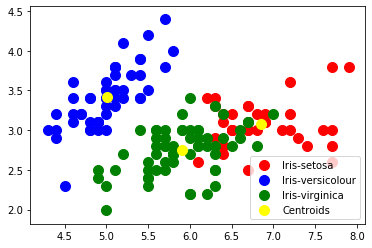

In [14]:

plt.scatter(X[y_kmeans == 0]['SepalLengthCm'], X[y_kmeans == 0]['SepalWidthCm'], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1]['SepalLengthCm'], X[y_kmeans == 1]['SepalWidthCm'], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2]['SepalLengthCm'], X[y_kmeans == 2]['SepalWidthCm'],
            s = 100, c = 'green', label = 'Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()